In [ ]:
# random forest for feature importance on a regression problem
import numpy as np
import csv
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [ ]:
# define dataset
df = pd.read_csv("PlasmaSomalogic.csv")
df_new = pd.DataFrame(columns=list(df.columns))
df_new=df = df.iloc[: , 1:]
print(df_new.head(5))
print(df_new.shape)


    STUB1  CEBPB    ENO2  PIAS4  IL10RA  STAT3    IRF1   MCL1   OAS1    MYC  \
0  1084.0  396.2  7065.9  490.7   702.9  761.0  1003.2  443.4  140.7  190.6   
1   916.7  492.2  6341.9  518.6   691.7  922.3  1226.6  728.3  328.1  214.2   
2   744.4  541.4  8916.0  615.5   742.4  595.8  2336.8  614.6  162.3  197.5   
3   831.0  544.7  5317.6  504.9   837.8  944.0  1011.6  459.2  150.6  307.6   
4  1033.4  558.4  4022.1  548.6   742.9  891.4  1146.8  522.3  148.4  196.4   

   ...  UBE2G2  TAGLN2   ATP5O  POMC.2  CRYZL1  SERPINF1    CTSF    FTCD  \
0  ...  4804.4  2233.0  3610.9   715.8   151.4   37885.8  1479.1  3261.8   
1  ...  5023.5  2108.8  2679.9   363.0   191.8   32384.0  1557.6  1950.0   
2  ...  4261.9  1804.6  1470.6   526.8   163.0   38938.3  1170.1  1036.8   
3  ...  4017.6  2057.7  2331.3   439.6   178.1   34359.5  1427.1  3149.2   
4  ...  4489.4  2653.4  2189.1   655.9   176.3   35281.1  1944.2  3266.7   

   USP25  PLXNB2  
0  561.3  3227.0  
1  701.3  3179.1  
2  552.8  3

In [ ]:
df_new.columns

Index(['STUB1', 'CEBPB', 'ENO2', 'PIAS4', 'IL10RA', 'STAT3', 'IRF1', 'MCL1',
       'OAS1', 'MYC',
       ...
       'UBE2G2', 'TAGLN2', 'ATP5O', 'POMC.2', 'CRYZL1', 'SERPINF1', 'CTSF',
       'FTCD', 'USP25', 'PLXNB2'],
      dtype='object', length=1300)

In [ ]:
columns_list=list(df_new.columns)

In [ ]:
df_feature=pd.read_csv("featureweeks.csv")

In [ ]:
feature_weeks=[]
for feature in df_feature["x"]:
  feature_weeks.append(feature)

In [ ]:
len(feature_weeks)

68

In [ ]:
X=df_new.copy() # Features
y=np.array(feature_weeks)

In [ ]:
X.shape

(68, 1300)

In [ ]:
y.shape

(68,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**Finding Important Features in Scikit-learn**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
X, y = make_regression(n_features=1300, n_informative=2,random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X, y)
RandomForestRegressor(...)
#print(regr.predict([[0, 0, 0, 0,0]]))

RandomForestRegressor(n_estimators=Ellipsis)

In [ ]:
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 24.7 MB/s 


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import shap
from matplotlib import pyplot as plt

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12)

In [ ]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
rf.feature_importances_

array([6.43679826e-01, 6.84803124e-02, 2.69061080e-04, 1.12546745e-05,
       1.66211496e-05, 1.96328349e-04, 1.11892980e-05, 2.89410121e-05,
       2.34434443e-05, 3.35864298e-03])

In [ ]:
plt.rcParams.update({'figure.figsize': (12.0, 16.0)})
plt.rcParams.update({'font.size': 10})

<BarContainer object of 534 artists>

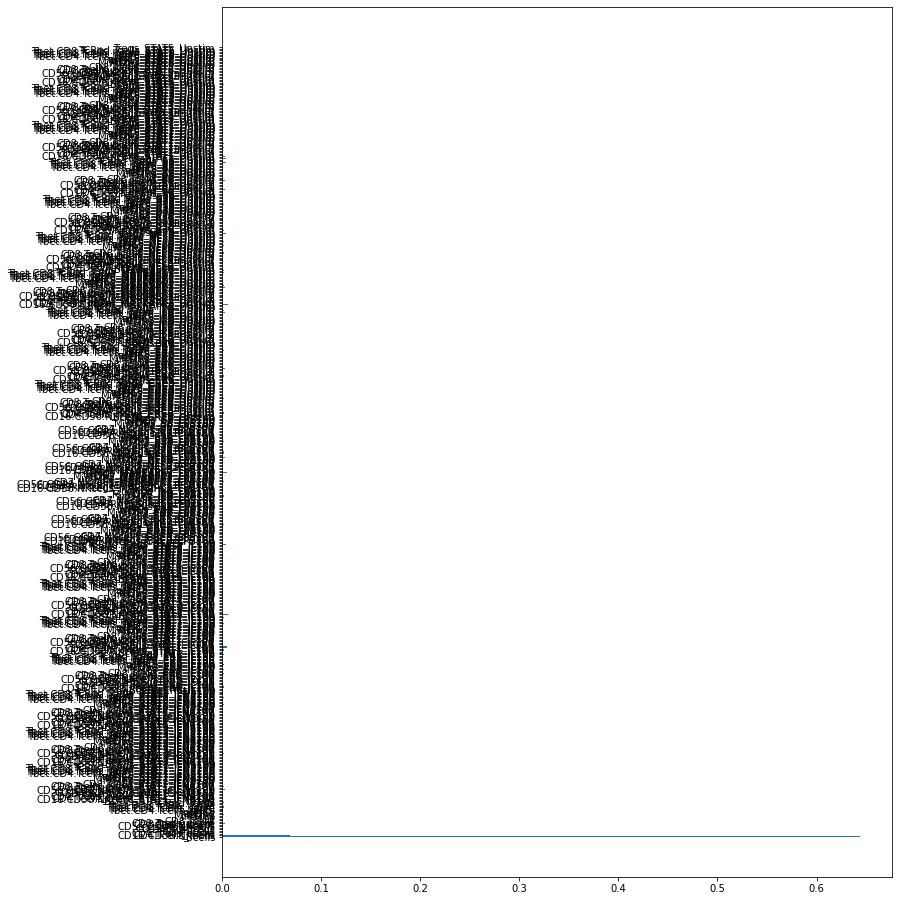

In [ ]:
plt.barh(X.columns, rf.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

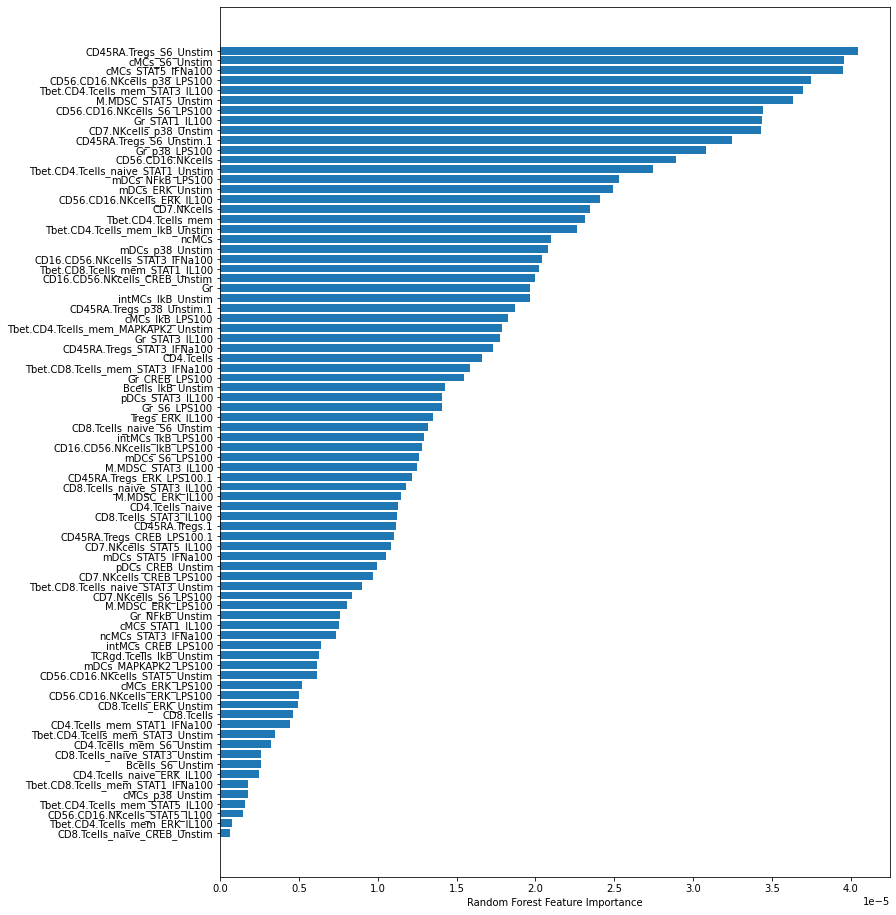

In [ ]:
sorted_idx = rf.feature_importances_.argsort()
sorted_idx=sorted_idx[:80]
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [ ]:
X.columns[sorted_idx]

Index(['CD4.Tcells_naive_STAT1_IL100', 'CD8.Tcells_STAT5_Unstim',
       'M.MDSC_NFkB_LPS100', 'Gr_MAPKAPK2_Unstim', 'cMCs_IkB_Unstim',
       'pDCs_p38_Unstim', 'CD16.CD56.NKcells_S6_LPS100', 'CD8.Tcells_mem',
       'M.MDSC_p38_LPS100', 'Tbet.CD4.Tcells_naive_CREB_Unstim',
       ...
       'mDCs_IkB_LPS100', 'CD4.Tcells_mem_STAT1_IL100', 'intMCs_STAT3_Unstim',
       'intMCs_STAT5_IFNa100', 'CD56.CD16.NKcells_STAT1_IFNa100',
       'Bcells_STAT5_Unstim', 'M.MDSC_CREB_Unstim',
       'Tbet.CD4.Tcells_mem_STAT1_IL100', 'CD16.CD56.NKcells', 'Bcells'],
      dtype='object', length=534)

Permutation Based Feature Importance (with scikit-learn)
The permutation based importance can be used to overcome drawbacks of default feature importance computed with mean impurity decrease. It is implemented in scikit-learn as permutation_importance method. As arguments it requires trained model (can be any model compatible with scikit-learn API) and validation (test data). This method will randomly shuffle each feature and compute the change in the model’s performance. The features which impact the performance the most are the most important one.

The permutation importance can be easily computed:

In [ ]:
perm_importance = permutation_importance(rf, X_test, y_test)

Text(0.5, 0, 'Permutation Importance')

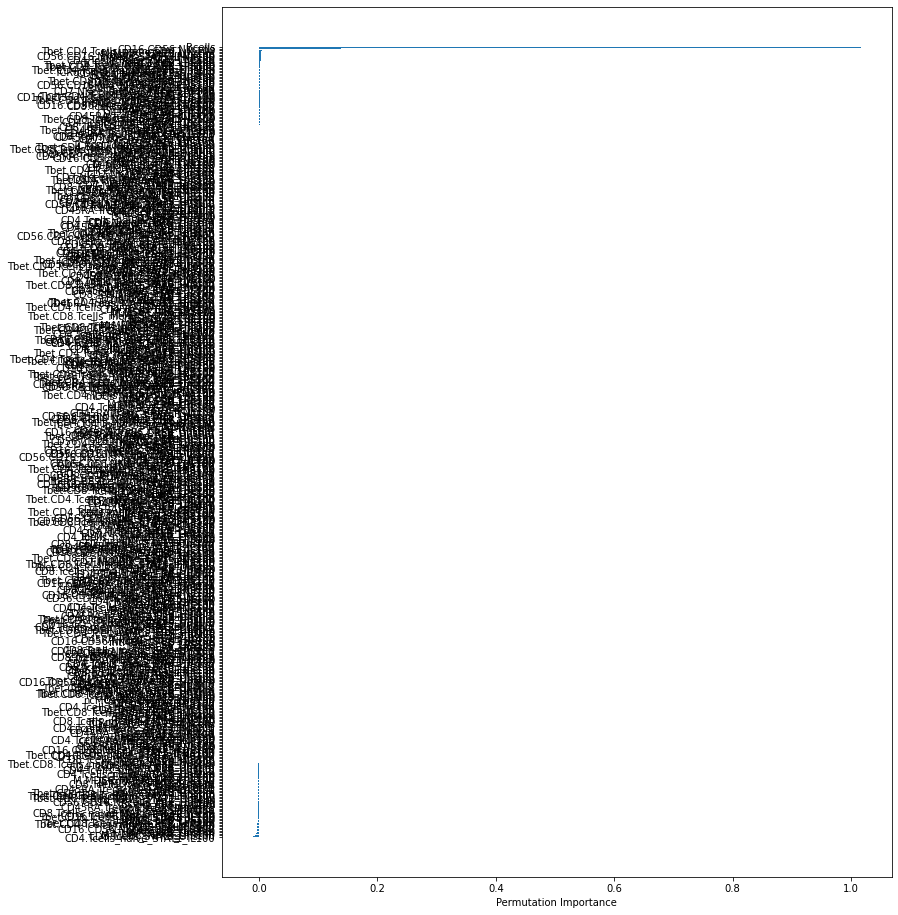

In [ ]:
sorted_idx = perm_importance.importances_mean.argsort()
#sorted_idx =sorted_idx[0:80]
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

The SHAP interpretation can be used (it is model-agnostic) to compute the feature importances from the Random Forest. It is using the Shapley values from game theory to estimate the how does each feature contribute to the prediction. It can be easily installed (pip install shap) and used with scikit-learn Random Forest:

The computing feature importances with SHAP can be computationally expensive. However, it can provide **more information** like decision plots or dependence plots.


In [ ]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

In [ ]:
max=shap_values.max()
shap_values[0][0]

95.22225670721849

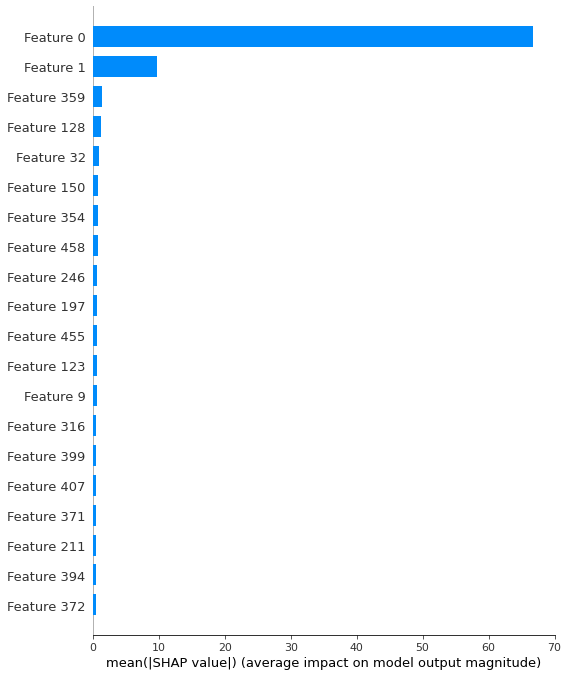

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

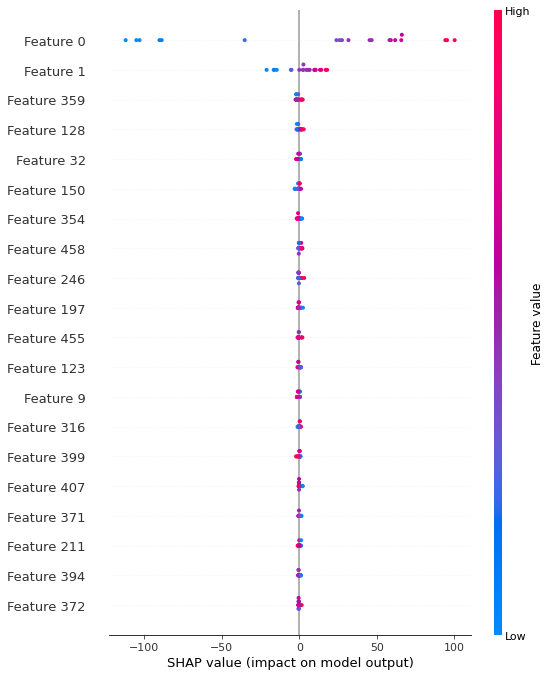

In [ ]:
shap.summary_plot(shap_values, X_test)

In [ ]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=columns_list).sort_values(ascending=False)
feature_imp


plasma.EOTAXIN    0.045181
plasma.IL12P40    0.041448
plasma.IL17F      0.034412
plasma.IL1B       0.032170
plasma.RANTES     0.029310
                    ...   
plasma.IL12P70    0.006283
plasma.IL17A      0.005936
plasma.TNFB       0.005339
plasma.IFNG       0.003020
plasma.NGF        0.002197
Length: 62, dtype: float64

In [ ]:
selected_feature_imp=feature_imp.iloc[0:10]
selected_feature_imp

pandas.core.series.Series

No handles with labels found to put in legend.


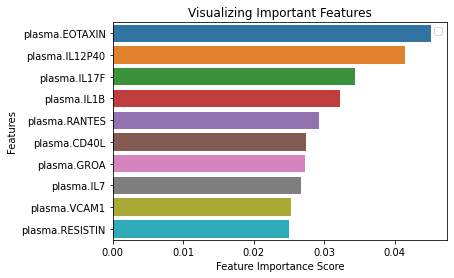

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=selected_feature_imp, y=selected_feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [ ]:
#To DataFrame
#df_features=feature_imp.to_frame()
#df_features.head(20)

**Random Forest for 13 features**

In [ ]:
col_list = approved_features=["plasma.TGFA","plasma.SDF1A","plasma.IP10","plasma.EOTAXIN","plasma.IL12P40","plasma.IL18","plasma.MIG","plasma.RESISTIN","plasma.IL22","plasma.PDGFBB","plasma.VEGF","plasma.PAI1","plasma.ENA78"]
df_13= pd.read_csv("PlasmaLuminex.csv", usecols=col_list)
print(df_13)

    plasma.TGFA  plasma.SDF1A  ...  plasma.PAI1  plasma.ENA78
0         27.75        191.25  ...      3707.50        213.50
1         48.50        186.25  ...      2319.00        158.50
2        453.75        575.50  ...      3481.25        724.25
3         31.00        272.00  ...      1768.50        178.50
4        194.25        345.75  ...      1855.50        301.25
..          ...           ...  ...          ...           ...
63        76.50        188.75  ...      4044.00       1397.75
64       114.50        183.50  ...      3194.25        285.25
65        65.75        176.00  ...      1969.25       1014.00
66        40.75        137.00  ...      3460.75        458.25
67       101.00        207.00  ...      2003.50        557.25

[68 rows x 13 columns]


In [ ]:
example=['plasma.IL2', 'plasma.IL5', 'plasma.EOTAXIN', 'plasma.NGF', 'plasma.IL23', 'plasma.IL18', 'plasma.MCSF', 'plasma.IL22', 'plasma.CD40L']
df_example= pd.read_csv("PlasmaLuminex.csv", usecols=example)
print(df_example)

    plasma.IL2  plasma.IL5  ...  plasma.IL22  plasma.CD40L
0        31.00       37.50  ...      43.0000        115.75
1        23.50       22.00  ...      79.6375        141.50
2       147.50      298.75  ...     144.7500       2731.75
3        32.75       40.75  ...      38.0000        120.75
4        51.00       47.50  ...      53.2500        176.00
..         ...         ...  ...          ...           ...
63       29.50       35.50  ...      46.0000        164.00
64       71.00      101.50  ...      70.2500        618.00
65       30.00       26.50  ...      41.5000         68.50
66       27.00       35.50  ...      36.5000         60.00
67       65.50       82.00  ...      70.5000        724.50

[68 rows x 9 columns]


In [ ]:
columns_list=list(df_example.columns)

In [ ]:
X_e=df_example[columns_list] # Features
y=label

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_e, y, test_size=0.1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=30,bootstrap=True)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(len(X_test))
print(len(y_pred))
print(y_pred)
print(y_test)

7
7
['3' '3' '2' '2' '3' '1' '4']
['4' '3' '1' '2' '4' '1' '1']


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.42857142857142855


In [ ]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=columns_list).sort_values(ascending=False)
feature_imp

plasma.EOTAXIN    0.189941
plasma.IL2        0.155608
plasma.IL5        0.128380
plasma.IL22       0.116444
plasma.MCSF       0.090266
plasma.CD40L      0.082773
plasma.IL23       0.080450
plasma.IL18       0.079917
plasma.NGF        0.076222
dtype: float64

In [ ]:
X2=df_13[columns_list] # Features
y=label

In [ ]:
X2

,plasma.TGFA,plasma.SDF1A,plasma.IP10,plasma.EOTAXIN,plasma.IL12P40,plasma.IL18,plasma.MIG,plasma.RESISTIN,plasma.IL22,plasma.PDGFBB,plasma.VEGF,plasma.PAI1,plasma.ENA78
0,27.75,191.25,106.50,37.5,301.50,458.00,55.0,6791.50,43.0000,62.5000,164.00,3707.50,213.50
1,48.50,186.25,260.00,53.5,317.50,457.00,51.5,6377.50,79.6375,267.7500,226.00,2319.00,158.50
2,453.75,575.50,781.50,82.0,587.75,1497.50,180.5,6057.00,144.7500,1145.5000,845.00,3481.25,724.25
3,31.00,272.00,204.25,38.5,216.00,368.25,64.0,5574.50,38.0000,256.0000,222.75,1768.50,178.50
4,194.25,345.75,556.25,34.0,207.25,767.25,90.0,4879.25,53.2500,1388.2500,469.00,1855.50,301.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,76.50,188.75,252.50,66.5,217.00,506.50,63.5,2737.50,46.0000,70.0000,290.00,4044.00,1397.75
64,114.50,183.50,230.25,115.5,203.00,645.25,64.0,3305.50,70.2500,529.7500,395.00,3194.25,285.25
65,65.75,176.00,301.00,79.0,264.75,382.25,51.5,4303.50,41.5000,109.0075,231.50,1969.25,1014.00
66,40.75,137.00,294.00,108.0,250.00,335.75,54.5,3164.25,36.5000,33.0000,196.50,3460.75,458.25


In [ ]:
y

array(['4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4',
       '4', '4', '4', '4', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '3',
       '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3',
       '3', '3', '3'], dtype='<U1')

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf2=RandomForestClassifier(n_estimators=50,bootstrap=True)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf2.fit(X_train2,y_train2)
y_pred2=clf2.predict(X_test2)
print(len(X_test2))
print(len(y_pred2))
print(y_pred2)
print(y_test2)

7
7
['3' '4' '3' '2' '4' '1' '4']
['3' '1' '3' '2' '3' '4' '3']


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))

Accuracy: 0.42857142857142855


In [ ]:
import pandas as pd
feature_imp2 = pd.Series(clf2.feature_importances_,index=columns_list).sort_values(ascending=False)
feature_imp2


plasma.EOTAXIN     0.157836
plasma.PAI1        0.104804
plasma.TGFA        0.092557
plasma.VEGF        0.083603
plasma.IL12P40     0.080466
plasma.RESISTIN    0.079295
plasma.PDGFBB      0.068726
plasma.IP10        0.065211
plasma.MIG         0.059642
plasma.IL22        0.056952
plasma.SDF1A       0.051738
plasma.IL18        0.050207
plasma.ENA78       0.048965
dtype: float64

In [ ]:
selected_feature_imp=feature_imp.iloc[0:5]
selected_feature_imp

plasma.EOTAXIN     0.161349
plasma.VEGF        0.101598
plasma.PDGFBB      0.089656
plasma.TGFA        0.089521
plasma.RESISTIN    0.086673
dtype: float64